In [2]:
import numpy as np
import re

In [16]:
data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised."""
data

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.'

In [17]:
sentences = data.split('.')
sentences

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 ' Learning can be supervised, semi-supervised or unsupervised',
 '']

In [18]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'learning can be supervised semi supervised or unsupervised']

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 1, 5, 6, 7, 2, 8, 1, 9, 10, 3, 11, 12, 13, 3, 14, 1, 15, 16, 17, 18, 19, 20, 21, 22, 1], [1, 23, 24, 4, 25, 4, 26, 27]]


In [20]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
#     print(word_in_sentence)
    
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{2: 'deep', 1: 'learning', 5: 'also', 6: 'known', 7: 'as', 8: 'structured', 9: 'is', 10: 'part', 3: 'of', 11: 'a', 12: 'broader', 13: 'family', 14: 'machine', 15: 'methods', 16: 'based', 17: 'on', 18: 'artificial', 19: 'neural', 20: 'networks', 21: 'with', 22: 'representation', 23: 'can', 24: 'be', 4: 'supervised', 25: 'semi', 26: 'or', 27: 'unsupervised'} 

{'deep': 2, 'learning': 1, 'also': 5, 'known': 6, 'as': 7, 'structured': 8, 'is': 9, 'part': 10, 'of': 3, 'a': 11, 'broader': 12, 'family': 13, 'machine': 14, 'methods': 15, 'based': 16, 'on': 17, 'artificial': 18, 'neural': 19, 'networks': 20, 'with': 21, 'representation': 22, 'can': 23, 'be': 24, 'supervised': 4, 'semi': 25, 'or': 26, 'unsupervised': 27}


In [8]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 50, 51], [8, 

In [21]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['deep', 'learning', 'family', 'known']  ->  broader
['learning', 'broader', 'known', 'deep']  ->  family
['broader', 'family', 'deep', 'machine']  ->  known
['family', 'known', 'machine', 'learning']  ->  deep
['known', 'deep', 'learning', 'methods']  ->  machine


In [23]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [24]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=80)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.0192 - loss: 4.3179  
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1424 - loss: 4.3111
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1676 - loss: 4.3036  
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1325 - loss: 4.2960
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1637 - loss: 4.2813
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1385 - loss: 4.2674
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1268 - loss: 4.2412 
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1328 - loss: 4.2043
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1332 - loss: 4.1532
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1115 - loss: 4.1150 
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1310 - loss: 4.0437
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0902 - loss: 3.9979 
Epoch

<Axes: >

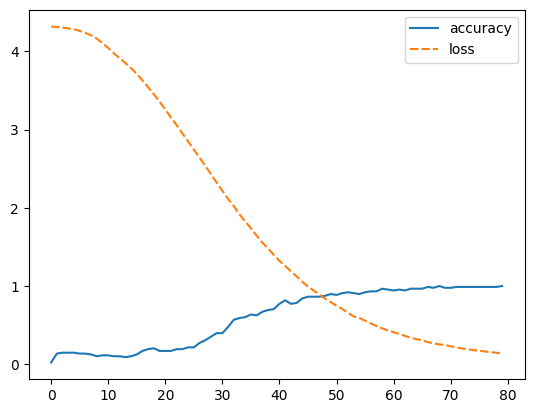

In [25]:
import seaborn as sns
sns.lineplot(model.history.history)

In [33]:
from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# test model: select some sentences from above paragraph
test_sentenses = [
     "known as structured learning",
    #"tra#nsformers have applied to",
    # "where they produced results",
    # "cases surpassing expert performance"
]

In [34]:
for sent in test_sentenses:
    test_words = sent.split(" ")
#     print(test_words)
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
#     print(x_test)
    
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= based 


